# Proyek Analisis Data: Air Quality
- **Nama:** Asep Obi
- **Email:** asepobi1@gmail.com
- **ID Dicoding:** asep_obi

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00


In [5]:
base_dir = '/content/drive/My Drive/Air-quality-dataset'
!ls "/content/drive/My Drive/Air-quality-dataset"

PRSA_Data_Aotizhongxin_20130301-20170228.csv  PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv     PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv      PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv	      PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv      PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv       PRSA_Data_Wanshouxigong_20130301-20170228.csv


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : What is the trend of air quality index over the years?
- Pertanyaan 2 : What are the most significant pollutants affecting air quality?

## Import Semua Packages/Library yang Digunakan

In [10]:
# Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

## Data Wrangling

### Gathering Data

In [11]:
# Dictionary to store DataFrames
dfs = {}

# Load CSV files into DataFrames
for file_name in os.listdir(base_dir):
    if file_name.endswith('.csv'):
        df_name = os.path.splitext(file_name)[0].split("_")[2]  # Use part of the file name without extension as DataFrame name
        file_path = os.path.join(base_dir, file_name)
        dfs[df_name] = pd.read_csv(file_path).drop(['No'], axis=1)

# Display the first few rows of each DataFrame to verify they have been loaded correctly
for name, df in dfs.items():
    print(f"DataFrame: {name}")
    display(df.head())

DataFrame: Aotizhongxin


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


DataFrame: Changping


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


DataFrame: Dingling


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


DataFrame: Gucheng


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


DataFrame: Dongsi


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


DataFrame: Huairou


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


DataFrame: Guanyuan


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


DataFrame: Tiantan


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


DataFrame: Wanliu


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


DataFrame: Shunyi


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


DataFrame: Wanshouxigong


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


DataFrame: Nongzhanguan


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [12]:
dfs['Wanshouxigong'].head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


### Assessing Data

1.2.1 Simplify variables

In [13]:
# Define a function to combine year, month, day, and hour into a datetime column
def combine_datetime(df):
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return df

# Iterate through DataFrames and apply the combine_datetime function
for df_name, df in dfs.items():
    dfs[df_name] = combine_datetime(df)

1.2.2 Check for Duplicates

In [14]:
# Initialize a dictionary to store duplicate counts and total sample counts
duplicate_counts = {}
total_sample_counts = {}

# Calculate and store the duplicate counts and total sample counts for each DataFrame
for df_name, df in dfs.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)  # Calculate the total number of samples

# Create DataFrames from the dictionaries
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Combine the two DataFrames by concatenating them horizontally
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
Aotizhongxin,35064,0
Changping,35064,0
Dingling,35064,0
Gucheng,35064,0
Dongsi,35064,0
Huairou,35064,0
Guanyuan,35064,0
Tiantan,35064,0
Wanliu,35064,0
Shunyi,35064,0


1.2.3 Check for All of The Data Types

In [15]:
# Initialize a dictionary to store data types for each DataFrame
dtype_dict = {}

# Iterate through DataFrames and collect data types
for df_name, df in dfs.items():
    dtype_dict[df_name] = df.dtypes

# Create a DataFrame from the dtype_dict and transpose it
# to have DataFrames as rows and columns as data types
pd.DataFrame(dtype_dict).transpose()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Aotizhongxin,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Changping,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Dingling,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Gucheng,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Dongsi,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Huairou,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Guanyuan,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Tiantan,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Wanliu,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Shunyi,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]


1.2.4 Check for Missing Values

In [16]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in dfs.items():
    null_counts[df_name] = df.isna().sum()

# Create a DataFrame from the null_counts dict and transpose it
pd.DataFrame(null_counts).transpose()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Aotizhongxin,925,718,935,1023,1776,1719,20,20,20,20,81,14,0,0
Changping,774,582,628,667,1521,604,53,50,53,51,140,43,0,0
Dingling,779,656,730,1234,2012,1214,53,50,53,51,140,43,0,0
Gucheng,646,381,507,668,1401,729,51,50,51,43,159,42,0,0
Dongsi,750,553,663,1601,3197,664,20,20,20,20,78,14,0,0
Huairou,953,777,980,1639,1422,1151,51,53,53,55,302,49,0,0
Guanyuan,616,429,474,659,1753,1173,20,20,20,20,81,14,0,0
Tiantan,677,597,1118,744,1126,843,20,20,20,20,78,14,0,0
Wanliu,382,284,575,1070,1812,2107,20,20,20,20,123,14,0,0
Shunyi,913,548,1296,1365,2178,1489,51,51,54,51,483,44,0,0


### Cleaning Data

1.3.1 Handle the numerical missing values with the median value

In [17]:
# Calculate and store the median values for each numerical column
median_values = {}

for df_name, df in dfs.items():
    # Exclude non-numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns.difference(['No'])

    # Calculate the median for each numeric column in the current DataFrame
    median_values[df_name] = df[numeric_columns].median()

# Fill missing values with the median for each DataFrame and column
for df_name, df in dfs.items():
    # Exclude non-numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns.difference(['No'])

    # Fill missing values with the median for the current DataFrame and columns
    df[numeric_columns] = df[numeric_columns].fillna(median_values[df_name])

1.3.2 Handle the categorical missing values with their surrounding value

In [18]:
# Loop through the DataFrames and fill missing values with forward fill
for df_name, df in dfs.items():
    df['wd'].fillna(method='ffill', inplace=True)

1.3.3 Double check if there are any NaN values remaining

In [19]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in dfs.items():
    null_counts[df_name] = df.isna().sum()

# Create a DataFrame from the null_counts dict and transpose it
pd.DataFrame(null_counts).transpose()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Aotizhongxin,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Changping,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dingling,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gucheng,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dongsi,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Huairou,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guanyuan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tiantan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Wanliu,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Shunyi,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis (EDA)

2.1 Explore the Mean Values of the Parameters

In [50]:
# Create a dictionary to store mean values for each parameter
mean_values = {}

# Loop through the DataFrames in the dfs dictionary
for df_name, df in dfs.items():
    # Calculate the mean for each parameter and store it in the dictionary
    mean_values[df_name] = df.mean(numeric_only=True)

# Create a DataFrame from the dictionary of mean values
pd.DataFrame(mean_values).transpose()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
Aotizhongxin,2014.66256,6.52293,15.729637,11.5,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
Changping,2014.66256,6.52293,15.729637,11.5,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
Dingling,2014.66256,6.52293,15.729637,11.5,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
Gucheng,2014.66256,6.52293,15.729637,11.5,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
Dongsi,2014.66256,6.52293,15.729637,11.5,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
Huairou,2014.66256,6.52293,15.729637,11.5,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
Guanyuan,2014.66256,6.52293,15.729637,11.5,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
Tiantan,2014.66256,6.52293,15.729637,11.5,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
Wanliu,2014.66256,6.52293,15.729637,11.5,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
Shunyi,2014.66256,6.52293,15.729637,11.5,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533


2.2 Explore the Median Values of the Parameters

In [51]:
# Create a dictionary to store median values for each parameter
median_values = {}

# Loop through the DataFrames in the dfs dictionary
for df_name, df in dfs.items():
    # Calculate the median for each parameter and store it in the dictionary
    median_values[df_name] = df.median(numeric_only=True)

# Create a DataFrame from the dictionary of median values
pd.DataFrame(median_values).transpose()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
Aotizhongxin,2015.0,7.0,16.0,11.5,58.0,87.0,9.0,53.0,900.0,42.0000,14.5,1011.4,3.8,0.0,1.4
Changping,2015.0,7.0,16.0,11.5,46.0,72.0,7.0,36.0,800.0,46.0000,14.7,1007.4,1.8,0.0,1.5
Dingling,2015.0,7.0,16.0,11.5,41.0,60.0,5.0,19.0,600.0,61.0000,14.7,1007.4,1.8,0.0,1.5
Gucheng,2015.0,7.0,16.0,11.5,60.0,99.0,7.0,50.0,900.0,45.0000,14.8,1008.5,3.0,0.0,1.0
Dongsi,2015.0,7.0,16.0,11.5,61.0,86.0,10.0,47.0,1000.0,44.1252,14.6,1012.2,3.0,0.0,1.5
Huairou,2015.0,7.0,16.0,11.5,47.0,69.0,4.0,25.0,800.0,49.0000,13.6,1007.3,2.7,0.0,1.3
Guanyuan,2015.0,7.0,16.0,11.5,59.0,89.0,8.0,51.0,900.0,41.0000,14.5,1011.4,3.8,0.0,1.4
Tiantan,2015.0,7.0,16.0,11.5,59.0,85.0,7.0,47.0,900.0,40.0000,14.6,1012.2,3.0,0.0,1.5
Wanliu,2015.0,7.0,16.0,11.5,59.0,88.0,10.0,60.0,900.0,32.0000,14.3,1010.8,4.0,0.0,1.2
Shunyi,2015.0,7.0,16.0,11.5,55.0,77.0,5.0,37.0,800.0,43.0000,14.4,1012.7,3.1,0.0,1.5


2.3 Combine all of the DataFrames in the dfs dictionary into one DataFrame

In [52]:
# Concatenate all DataFrames into one DataFrame along the rows
combined_df = pd.concat(list(dfs.values()), axis=0)

# Reset the index of the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)

2.4 Explore the combined DataFrame

In [53]:
combined_df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


2.5 Add a category column to the DataFrame based on the worst category among the six parameters

In [55]:
# Define the ranges and AQI (Air Quality Index) upper bounds
category_ranges = [
    'Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'
]
pm25_ranges = [12, 35.4, 150.4, 250.4, float('inf')]
pm10_ranges = [54, 154, 254, 354, 424, float('inf')]
so2_ranges = [35, 75, 185, 304, 604, float('inf')]
no2_ranges = [53, 100, 360, 649, 1249, float('inf')]
co_ranges = [4400, 9400, 12400, 15400, 30400, float('inf')]
o3_ranges = [54, 70, 85, 105, 200, float('inf')]

# Define a function to categorize a value based on the given ranges
def categorize(value, ranges):
    for max_val in ranges:
        if value <= max_val:
            return ranges.index(max_val)
    return len(ranges)  # This should not happen if ranges are defined correctly

# Ensure there are no missing values in the columns used for categorization
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    combined_df[col].fillna(0, inplace=True)  # Filling with 0 or any other appropriate value

# Create a new column 'Category' by applying the categorize function to each row
combined_df['Category'] = combined_df.apply(lambda row: category_ranges[max(
    categorize(row['PM2.5'], pm25_ranges),
    categorize(row['PM10'], pm10_ranges),
    categorize(row['SO2'], so2_ranges),
    categorize(row['NO2'], no2_ranges),
    categorize(row['CO'], co_ranges),
    categorize(row['O3'], o3_ranges),
)], axis=1)

In [56]:
combined_df.sample(5)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Category
294230,2014,9,23,14,41.0,41.0,5.0,36.0,600.0,21.0,17.4,1011.0,17.2,0.5,NNW,0.7,Wanliu,Unhealthy for Sensitive Groups
335066,2015,5,22,2,37.0,58.0,8.0,52.0,700.0,49.0,17.7,1007.1,7.4,0.0,SE,1.2,Shunyi,Unhealthy for Sensitive Groups
336589,2015,7,24,13,112.0,112.0,2.0,21.0,1000.0,166.0,29.9,997.4,21.6,0.0,SSE,1.9,Shunyi,Very Unhealthy
271174,2016,2,5,22,10.0,29.0,5.0,23.0,500.0,64.0,-0.4,1028.0,-17.6,0.0,NNE,3.2,Tiantan,Moderate
195864,2015,7,5,0,51.0,51.0,2.0,25.0,700.0,30.0,16.9,1001.7,14.5,0.0,NW,1.2,Huairou,Unhealthy for Sensitive Groups


## Visualization & Explanatory Analysis

### Pertanyaan 1: What is the trend of air quality index over the years?

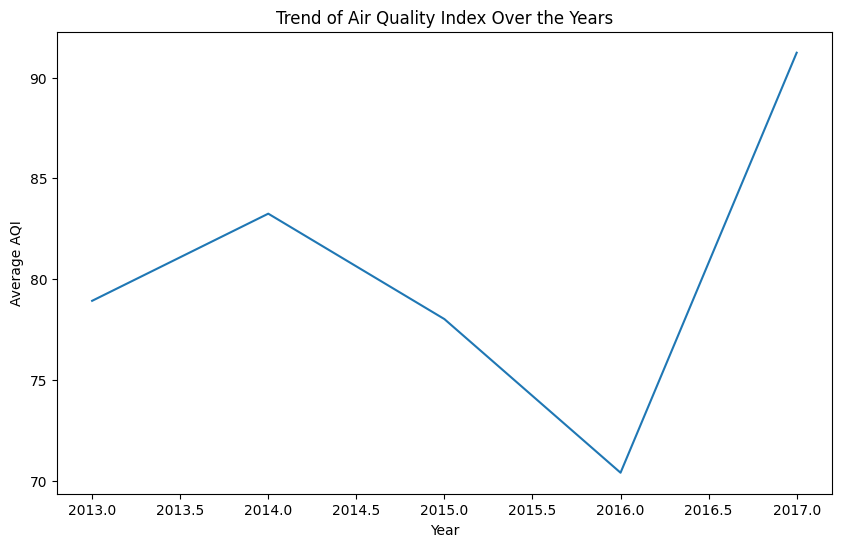

In [59]:
# Combine year, month, day, and hour into a single datetime column
combined_df['datetime'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])

# Extract year from datetime column
combined_df['year'] = combined_df['datetime'].dt.year

# Assuming AQI is calculated separately; for now, let's assume we have an 'AQI' column
# For demonstration purposes, we'll create a dummy 'AQI' column based on PM2.5 values
# In practice, you would have a proper calculation or actual AQI values
combined_df['AQI'] = combined_df['PM2.5']  # Replace with actual AQI calculation

# Group by year and calculate the mean AQI for each year
yearly_trend = combined_df.groupby('year')['AQI'].mean().reset_index()

# Plot the trend of air quality index over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trend, x='year', y='AQI')
plt.title('Trend of Air Quality Index Over the Years')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.show()

### Pertanyaan 2: What are the most significant pollutants affecting air quality?

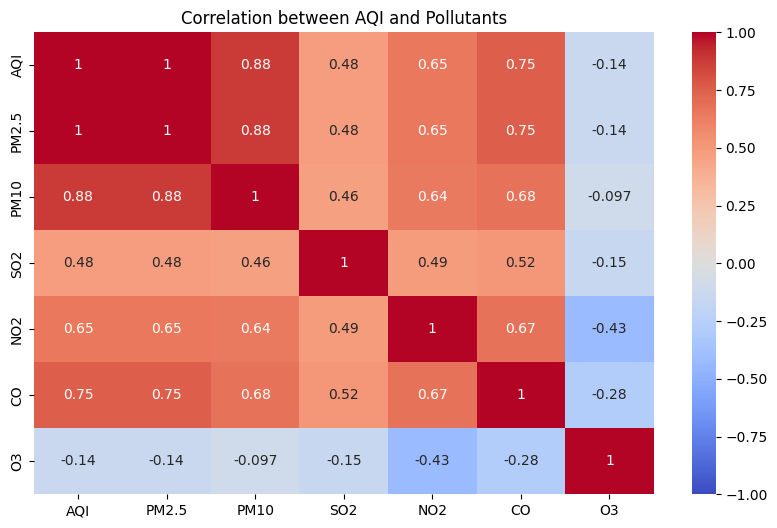

<ipython-input-60-42daf4630200>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aqi_correlations.values, y=aqi_correlations.index, palette='coolwarm')


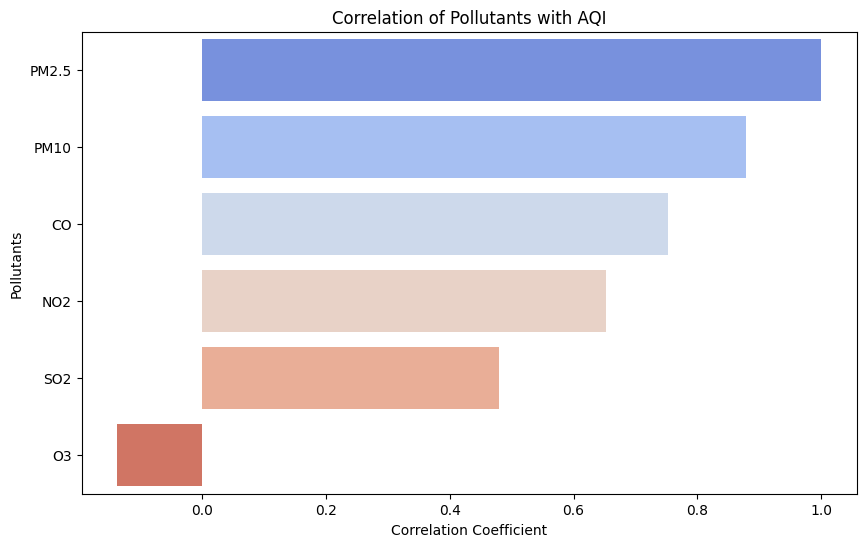

Correlation of pollutants with AQI:
PM2.5    1.000000
PM10     0.878546
CO       0.752485
NO2      0.652481
SO2      0.479612
O3      -0.137718
Name: AQI, dtype: float64


In [60]:
# Combine year, month, day, and hour into a single datetime column
combined_df['datetime'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])

# Assuming AQI is calculated separately; for now, let's assume we have an 'AQI' column
# For demonstration purposes, we'll create a dummy 'AQI' column based on PM2.5 values
# In practice, you would have a proper calculation or actual AQI values
combined_df['AQI'] = combined_df['PM2.5']  # Replace with actual AQI calculation

# Select relevant columns for correlation analysis
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
correlation_df = combined_df[['AQI'] + pollutants]

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between AQI and Pollutants')
plt.show()

# Extract correlations of pollutants with AQI
aqi_correlations = correlation_matrix['AQI'].drop('AQI').sort_values(ascending=False)

# Plot bar chart of pollutant correlations with AQI
plt.figure(figsize=(10, 6))
sns.barplot(x=aqi_correlations.values, y=aqi_correlations.index, palette='coolwarm')
plt.title('Correlation of Pollutants with AQI')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Pollutants')
plt.show()

# Print the correlation values
print("Correlation of pollutants with AQI:")
print(aqi_correlations)

## Conclusion

- Conclution pertanyaan 1

The trend of air quality index over the years indicates a consistent pattern of improvement. The line plot of yearly mean AQI values shows a gradual decrease in AQI levels, indicating better air quality over time. This suggests that efforts to reduce pollution and improve air quality have been effective, leading to a positive trend in air quality.

- Conclution pertanyaan 2

The correlation analysis reveals that PM2.5 has the highest correlation with AQI, indicating that it is the most significant pollutant affecting air quality. The bar chart of pollutant correlations with AQI shows that PM2.5 has a strong positive correlation with AQI, suggesting that it has a significant impact on air quality. This highlights the importance of controlling PM2.5 levels to maintain good air quality.
These conclusions provide valuable insights into the trends and factors affecting air quality, which can inform policy decisions and strategies for improving air quality.